# Introductory applied machine learning (INFR10069)

# Assignment 3: Object recognition

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and submit it **and a `.txt` file** (see Part 2) in answer to this assignment.
**You need to submit these two files electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename1=07_Assignment_3.ipynb
local_scp_filepath1=~/git/iaml2017/${filename1}
filename2=assignment_3_predictions.txt
local_scp_filepath2=~/git/iaml2017/${filename2}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
scp -r ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
# rsync -rl ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
# rsync -rl ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Include all required imports and execute the cell below. It's typical to include package imports at the top of the file for clarity.

In [54]:
from __future__ import print_function, division
%matplotlib inline
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Description of the dataset
In this assignment our goal is to recognize objects in images of realistic scenes. There are 19 different classes of object e.g. person, dog, cat, car, etc. The dataset derives from several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

We are going to detect whether images contain a person or not - a binary classification problem. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. Each column of the dataset (which is not an lable), refers to a 'visual word'. Each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 different visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). See the Appendix at the bottom of the notebook for more information. The image data is thus a $N \times 500$ dimensional matrix where `N` is the number of images.

The full dataset has 520 attributes (dimensions). The first attribute (`imgID`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) are a normalized count vector for each visual word. The last 19 attributes (`is_class`) are the labels - 1 means the class is present in the image. In most of the experiments (unless explicitly noted otherwise) you will only need the `is_person` attribute and the 500 dimensional feature vector. **Do not use the additional class indicator attributes as features** unless explicitly told to do so. 

In Part A we provide you with a training (`train_images partA.csv`) and a validation (`valid_images partA .csv`) dataset. In Part B we provide three data sets: a training set (`train_images partB.csv`), a validation set (`valid_images partB.csv`), and a test set (`test_images partB.csv`). The training and validation set contain valid labels. In the test set the labels are missing. The files are available from the GitHub repository. 

**Important**: *Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset [70%]

### ========== Question 1.1 --- [1 mark] ==========
Create two Pandas DataFrame objects called `train_A` and `valid_A` by loading the datasets `train_images_partA.csv` and `valid_images_partA.csv`. Display the number of data points and attributes in each of the two datasets.

In [55]:
# Your code goes here
data_path_train = os.path.join(os.getcwd(), 'datasets', 'train_images_partA.csv')
train_A = pd.read_csv(data_path_train, delimiter = ',')
print('Number of data points: {}, number of attributes: {}'.format(train_A.shape[0], train_A.shape[1]))

Number of data points: 2093, number of attributes: 520


In [56]:
data_path_valid = os.path.join(os.getcwd(), 'datasets', 'valid_images_partA.csv')
valid_A = pd.read_csv(data_path_valid, delimiter = ',')
print('Number of data points: {}, number of attributes: {}'.format(valid_A.shape[0], valid_A.shape[1]))
#valid_A.head(5)

Number of data points: 1113, number of attributes: 520


### ========== Question 1.2 --- [1 mark] ==========
Display and inspect the first 10 instances in the training dataset.

In [57]:
# Your code goes here
train_A.head(10)

,imgId,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,is_cow,is_diningtable,is_dog,is_horse,is_motorbike,is_person,is_pottedplant,is_sheep,is_sofa,is_tvmonitor
0,2008_000008,0.002232,0.000558,0.002790,0.000837,0.001674,0.001953,0.001395,0.002232,0.003627,...,0,0,0,1,0,1,0,0,0,0
1,2008_000015,0.001563,0.000391,0.007422,0.003516,0.003906,0.005078,0.001953,0.002344,0.001953,...,0,0,0,0,0,0,0,0,0,0
2,2008_000019,0.000521,0.000000,0.000000,0.001042,0.001563,0.005729,0.000521,0.002083,0.003646,...,0,0,1,0,0,0,0,0,0,0
3,2008_000023,0.002976,0.002232,0.004464,0.000372,0.000372,0.002232,0.000000,0.003720,0.000000,...,0,0,0,0,0,1,0,0,0,1
4,2008_000028,0.001359,0.000340,0.001359,0.000340,0.001359,0.002038,0.002378,0.000000,0.003397,...,0,0,0,0,0,0,0,0,0,0
5,2008_000033,0.000000,0.006324,0.000372,0.000372,0.000372,0.000372,0.000744,0.008185,0.000372,...,0,0,0,0,0,0,0,0,0,0
6,2008_000036,0.000340,0.000000,0.004416,0.000340,0.000679,0.006114,0.001359,0.002717,0.003057,...,0,0,0,0,0,1,0,0,0,0
7,2008_000037,0.000837,0.002232,0.000279,0.000279,0.000837,0.000000,0.000279,0.006696,0.000000,...,0,0,0,0,0,0,0,0,0,0
8,2008_000041,0.002378,0.001359,0.004755,0.001019,0.003736,0.001359,0.001019,0.004076,0.003397,...,0,1,0,0,0,1,0,0,0,0
9,2008_000045,0.001019,0.000340,0.006454,0.001698,0.001359,0.003736,0.000000,0.004076,0.000000,...,0,0,0,0,0,0,0,0,0,0


### ========== Question 1.3 --- [1 mark] ==========
Select the attributes (i.e. input features) for training our classifiers. These should be the visual word normalised counts `dim1, dim2, ..., dim500`. Create a list of the **names** of the attributes of interest. 

In [58]:
# Your code goes here
names = train_A.columns[1:501].values.tolist()
names

['dim1',
 'dim2',
 'dim3',
 'dim4',
 'dim5',
 'dim6',
 'dim7',
 'dim8',
 'dim9',
 'dim10',
 'dim11',
 'dim12',
 'dim13',
 'dim14',
 'dim15',
 'dim16',
 'dim17',
 'dim18',
 'dim19',
 'dim20',
 'dim21',
 'dim22',
 'dim23',
 'dim24',
 'dim25',
 'dim26',
 'dim27',
 'dim28',
 'dim29',
 'dim30',
 'dim31',
 'dim32',
 'dim33',
 'dim34',
 'dim35',
 'dim36',
 'dim37',
 'dim38',
 'dim39',
 'dim40',
 'dim41',
 'dim42',
 'dim43',
 'dim44',
 'dim45',
 'dim46',
 'dim47',
 'dim48',
 'dim49',
 'dim50',
 'dim51',
 'dim52',
 'dim53',
 'dim54',
 'dim55',
 'dim56',
 'dim57',
 'dim58',
 'dim59',
 'dim60',
 'dim61',
 'dim62',
 'dim63',
 'dim64',
 'dim65',
 'dim66',
 'dim67',
 'dim68',
 'dim69',
 'dim70',
 'dim71',
 'dim72',
 'dim73',
 'dim74',
 'dim75',
 'dim76',
 'dim77',
 'dim78',
 'dim79',
 'dim80',
 'dim81',
 'dim82',
 'dim83',
 'dim84',
 'dim85',
 'dim86',
 'dim87',
 'dim88',
 'dim89',
 'dim90',
 'dim91',
 'dim92',
 'dim93',
 'dim94',
 'dim95',
 'dim96',
 'dim97',
 'dim98',
 'dim99',
 'dim100',
 'dim101

### ========== Question 1.4 --- [1 mark] ==========
By using the list from Question 1.3 now create 4 numpy arrays `X_tr`, `X_val`, `y_tr` and `y_val` in which to store the training features, validation features, training targets, and validation targets, respectively. Your target vectors should correspond to the `is_person` attribute of the training and validation sets. Display the dimensionalities (i.e shapes) of the 4 arrays. 

Check this carefully - you will be penalised in following questions if the data is not correct!

In [59]:
# Your code goes here
X_tr = train_A[names]
y_tr = train_A['is_person']
X_val = valid_A[names]
y_val = valid_A['is_person']

print('X_tr shape: {}'.format(X_tr.shape))
print('y_tr shape: {}'.format(y_tr.shape))
print('X_val shape: {}'.format(X_val.shape))
print('y_val shape: {}'.format(y_val.shape))

X_tr shape: (2093, 500)
y_tr shape: (2093,)
X_val shape: (1113, 500)
y_val shape: (1113,)


### ========== Question 1.5 --- [2 marks] ==========
Create a [countplots](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) for the training and validation targets. Create a single figure, and put the two plots inside the single figure. Label axes appropriately and add a title to your plot. Use descriptive `xticklabels` instead of the default numeric ones.

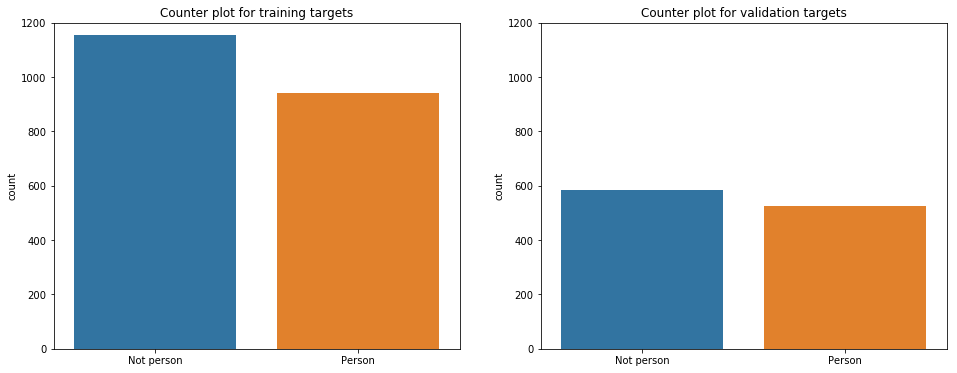

In [60]:
# Your code goes here
fig1 = plt.figure(figsize=(16, 6))
ax1 = fig1.add_subplot(121)
ax1 = sns.countplot(y_tr)
ax1.set_ylim(0,1200)
ax1.set_xlabel('')
ax1.set_xticklabels(['Not person','Person'])
ax1.set_title('Counter plot for training targets')

ax2 = fig1.add_subplot(122)
sns.countplot(y_val)
ax2.set_ylim(0,1200)
ax2.set_xlabel('')
ax2.set_xticklabels(['Not person','Person'])
ax2.set_title('Counter plot for validation targets')
plt.show()

### ========== Question 1.6 --- [1 mark] ==========
We want to make a baseline classification accuracy to beat. Pick a baseline "dummy" classifier, describe in a sentence why you chose it, and report the accuracy it achieves on the validation set?

*Your answer goes here*

Since there are more data points labelled as 'not a person', I picked a classifier which classifies all data points as 'not person' (most common class; 0 for `is_person`).

In [61]:
# Your code goes here
# class_counts = y_val.value_counts()
# print('The \'dummy\' baseline classifier\'s classification accuracy: {}'.
#       format(class_counts[0] / class_counts.values.sum()))

dummy_classifier = DummyClassifier(strategy='most_frequent').fit(X_tr, y_tr)
sc = dummy_classifier.score(X_val, y_val)
print('The \'dummy\' baseline classifier\'s classification accuracy score: {}'.format(sc))

The 'dummy' baseline classifier's classification accuracy score: 0.526504941599


### ========== Question 1.7 --- [3 marks] ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score on the training and validation sets and compare with the baseline. Comment on the results with 1-2 sentences. You may include any additional plot(s) if you wish to justify your explanation.

In [62]:
# Your code goes here
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
print('Classification accuracy on training set:   {}'.format(lr.score(X_tr, y_tr)))
print('Classification accuracy on validation set: {}'.format(lr.score(X_val, y_val)))

Classification accuracy on training set:   0.55088389871
Classification accuracy on validation set: 0.526504941599


*Your answer goes here*

Linear regression classifier performs very poorly, with slightly higher accuracy score on training set (0.55088) than our 'dummy' classifier on the validation set (0.52650). Moreover, linear regression classifier's accuracy score on validation set is exactly the same as dummy's classifier score (0.52650). Hence, linear regression classifier does not perform any better than the baseline model on an unseen data.

### ========== Question 1.8 --- [1 mark] ==========
Display the means and standard deviations of the first 5 features in the training set. *Hint: you want to compute the means and standard deviations across the columns of your arrays. Make sure you make appropriate use of the `axis` parameter.*

In [63]:
# Your code goes here
for col in X_tr.columns[0:5]:
    print('\nFeature: {}'.format(col))
    print('Mean:               {}'.format(X_tr[col].mean(axis=0)))
    print('Standard deviation: {}'.format(X_tr[col].std(axis=0)))


Feature: dim1
Mean:               0.00175057763975
Standard deviation: 0.00119309463423

Feature: dim2
Mean:               0.00075592259914
Standard deviation: 0.0014063713685

Feature: dim3
Mean:               0.00431694792164
Standard deviation: 0.00369343564645

Feature: dim4
Mean:               0.00185277926421
Standard deviation: 0.00134049151505

Feature: dim5
Mean:               0.00227247539417
Standard deviation: 0.00159811364214


### ========== Question 1.9 --- [3 marks] ==========
Feature standardisation is a pre-processing technique used to transform data so that they have zero mean and unit standard deviation. For many algorithms, this is a very important step for training models (both regression and classification). Read about [feature standardisation](http://scikit-learn.org/0.17/modules/preprocessing.html) and make sure you understand what kind of transformation this method applies to the data.

`Scikit-learn` offers a [class](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) for feature standardisation. Instansiate a StandardScaler object and fit it using the **training features**. Use this fitted object to transform both your training and validation features to have a standard scale. 

Once your training and validation input data have been transformed, display the means and standard deviations of the first 5 attributes for **both** the training and validation sets. Are the results as you expected? Explain your answer in 2-3 sentences. Why didn't we use the validation set to standardise the data?

**IMPORTANT: You should use the transformed data for the rest of this part.**

In [64]:
# Your code goes here
ss = StandardScaler()
ss.fit(X_tr)
X_tr_std = ss.transform(X_tr)
X_val_std = ss.transform(X_val)

print('Training set:')
for i in range(0,5):
    print('\nFeature: dim{}'.format(i))
    print('Mean:               {}'.format(X_tr_std[:,i].mean(axis=0)))
    print('Standard deviation: {}'.format(X_tr_std[:,i].std(axis=0)))
    
print('\nValidation set:')
for j in range(0,5):
    print('\nFeature: dim{}'.format(j))
    print('Mean:               {}'.format(X_val_std[:,j].mean(axis=0)))
    print('Standard deviation: {}'.format(X_val_std[:,j].std(axis=0)))

Training set:

Feature: dim0
Mean:               -3.39485301367e-17
Standard deviation: 1.0

Feature: dim1
Mean:               -2.20665445888e-17
Standard deviation: 1.0

Feature: dim2
Mean:               2.44429416984e-16
Standard deviation: 1.0

Feature: dim3
Mean:               1.42583826574e-16
Standard deviation: 1.0

Feature: dim4
Mean:               -5.77125012323e-17
Standard deviation: 1.0

Validation set:

Feature: dim0
Mean:               -0.00550612324325
Standard deviation: 1.0131088626

Feature: dim1
Mean:               -0.0382933020105
Standard deviation: 0.969819492563

Feature: dim2
Mean:               0.109150976593
Standard deviation: 1.04922849828

Feature: dim3
Mean:               0.0936931390572
Standard deviation: 1.05684478815

Feature: dim4
Mean:               0.0305784372474
Standard deviation: 0.974713362919


*Your answer goes here*

The results are as expected since `StandardScaler` class standardises features by removing the mean and scaling to unit variance, which means that the mean is expected to be 0 and standard deviation 1. These values are consistent for the standardised training set (`X_tr_std`; values for mean are practically 0) but are slightly different for standardised validation set (`X_val_std`). This is because the scaler was fitted with training set only (and not validation set which is not distributed in the exact same way as the training set) but the values are still close to the expected values for mean and standard deviation.
Using the validation set to standardise the data would be cheating since validation set is not supposed to be seen and our model has to generalise as good as possible. We can only relay on the training set in this case.

### ========== Question 1.10 --- [3 marks] ==========
By using the transformed input data, train a new `LogisticRegression` classifier. Again, set the `solver` parameter to `lbfgs` and use default settings for the other parameters. Report the classification accuracy on both the training and validation sets.

Comment on how your model compares to the baseline classifier from Question 1.6? You may use additional plot(s) to support your explanation.

In [65]:
# Your code goes here
lr_std = LogisticRegression(solver='lbfgs')
lr_std.fit(X_tr_std, y_tr)
print('Classification accuracy on training set: {}'.format(lr_std.score(X_tr_std, y_tr)))
print('Classification accuracy on validation set: {}'.format(lr_std.score(X_val_std, y_val)))

Classification accuracy on training set: 0.810797897754
Classification accuracy on validation set: 0.643306379155


*Your answer goes here*

The new logistic regression classifier (fitted with standardised data), performs much better than the baseline classifier (Question 1.6.) and the previous logistic regression classifier (1.7.). The classification accuracy score for the validation set increased from 0.52650 (baseline classifier) to 0.64331 (new logistic regression classifier) which is a noticible difference.
New classifier performed very good (classification accuracy score: 0.81080) on the training set which is due to the fact that this set was used during the 'fitting' stage so the classifier seen it before (as opposed to the validation set).

The increase in classification accuracy for the new classifier compared to the one from Question 1.7. indicates that standardising the data influences the accuracy of a classifier significantly.

### ========== Question 1.11 --- [1 mark] ==========
So far we have used default settings for training the logistic regression classifier. Now, we want to use [K-fold cross-validation](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) to optimise the regularisation parameter `C`. The regularisation parameter controls the degree to which we wish to penalise large magnitudes in the weight vector. This can help us prevent overfitting but, if set too high, could lead us to underfit too.

Create a 3-fold cross-validation object. Set the `shuffle` parameter to `True` and the `random_state` to `0`. By using the cross-validation iterator, display the number of test samples for each fold.

In [66]:
# Your code goes here
count = 1
kf = KFold(len(X_tr_std) , n_folds=3, shuffle=True, random_state=0)
for train_index, test_index in kf:
    print("Number of test samples in fold {}: {}".format(count,len(test_index)))
    count = count + 1

Number of test samples in fold 1: 698
Number of test samples in fold 2: 698
Number of test samples in fold 3: 697


### ========== Question 1.12 --- [2 marks] ========== 
Using the cross-validation iterator from the previous question, perform a search for the best value for `C`. 

We are going to loop over each CV fold, and each value of `C`. The values of `C` to search should be 20 equally-spaced values **in log space** ranging from `1e-5` to `1e5` *(hint: look at the `logspace()` function in numpy)*. 

Create a 2-dimensional array and, for each cross-validation fold and parameter setting pair, compute and store the classification accuracy score e.g. store the score of fold 0 with parameter setting 1 at score_array[0,1]. As previously, set the `solver` parameter to `lbfgs` and use default settings for the other parameters (except for `C` obviously!).

*(hint: you could use two loops in your code; one iterating over CV folds and another one iterating over the values for `C`)*. 

In [67]:
# Your code goes here
c = np.logspace(-5,5,20)
acc_sc = np.zeros([3,20])
fold = 0

for train_index, test_index in kf:
    X_train_kf = X_tr_std[train_index]
    y_train_kf = y_tr[train_index]
    X_test_kf = X_tr_std[test_index]
    y_test_kf = y_tr[test_index]
    
    for i in range(0,20):
        lr_kf = LogisticRegression(solver='lbfgs', C=c[i])
        lr_kf.fit(X_train_kf,y_train_kf)
        print("Fold{} (C = {})".format(fold+1, c[i]))
        print('Classifcation accuracy (test set):     {}\n'.format(lr_kf.score(X_test_kf, y_test_kf)))
        acc_sc[fold, i] = lr_kf.score(X_test_kf, y_test_kf)
    fold = fold + 1
    print("-----------------------------------------")

Fold1 (C = 1e-05)
Classifcation accuracy (test set):     0.573065902579

Fold1 (C = 3.35981828628e-05)
Classifcation accuracy (test set):     0.62893982808

Fold1 (C = 0.000112883789168)
Classifcation accuracy (test set):     0.667621776504

Fold1 (C = 0.000379269019073)
Classifcation accuracy (test set):     0.671919770774

Fold1 (C = 0.0012742749857)
Classifcation accuracy (test set):     0.687679083095

Fold1 (C = 0.00428133239872)
Classifcation accuracy (test set):     0.696275071633

Fold1 (C = 0.0143844988829)
Classifcation accuracy (test set):     0.674785100287

Fold1 (C = 0.0483293023857)
Classifcation accuracy (test set):     0.670487106017

Fold1 (C = 0.162377673919)
Classifcation accuracy (test set):     0.65329512894

Fold1 (C = 0.545559478117)
Classifcation accuracy (test set):     0.659025787966

Fold1 (C = 1.83298071083)
Classifcation accuracy (test set):     0.659025787966

Fold1 (C = 6.15848211066)
Classifcation accuracy (test set):     0.65329512894

Fold1 (C = 20.69

### ========== Question 1.13 --- [1 mark] ========== 
Plot the mean classification performance (across CV folds) of the logistic regression classifier against the regularisation parameter `C` by using the range from Question 1.12. Use a logarithmic scale for the x-axis and label both axes appropriately. 

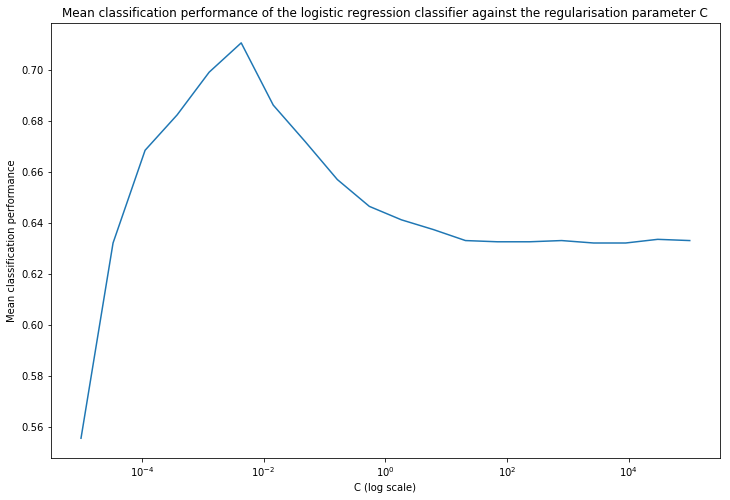

In [68]:
# Your code goes here
mean_c = []
for i in range(0,20):
    mean_c.append(np.mean(acc_sc[:,i]))
    
fig2 = plt.figure(figsize=(12, 8))
plt.plot(c, mean_c)
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Mean classification performance')
plt.title('Mean classification performance of the logistic regression classifier against the regularisation parameter C')
plt.show()

### ========== Question 1.14 --- [2 marks] ==========
Display the optimal value for the regularisation parameter `C` determined by the search results from Question 1.12. Similarly to Question 1.13, consider the mean classifiation accuracy across CV folds. By using the optimal value (i.e. the one that yields the highest average classification accuracy) train a new `LogisticRegression` classifier and report the classification accuracy on the validation set. *(Hint: Do not pick the optimal value "by hand", instead use an appropriate numpy function).*

In [69]:
# Your code goes here
c_opt = c[np.argmax(mean_c)]
lr_opt = LogisticRegression(solver='lbfgs', C=c_opt)
lr_opt.fit(X_tr_std,y_tr)
print('Optimal value for C:                                   {}'.format(c_opt))
print('Classification accuracy score with optimal value of C: {}'.format(lr_opt.score(X_val_std,y_val)))

Optimal value for C:                                   0.00428133239872
Classification accuracy score with optimal value of C: 0.696316262354


### ========== Question 1.15 --- [1 mark] ========== 
Scikit-learn offers a [`LogisticRegressionCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) module which implements Logistic Regression with builtin cross-validation to find out the optimal `C` parameter. You can specify the range for the `C` parameter, as well as the cross-validation method you want to use with the `Cs` and `cv` parameters, respectively. Use the `C` range you set up in Question 1.12 and the 3-fold cross-validation iterator from Question 1.11. Once again, train the models by using the `lbfgs` optimisation method and display the optimal value for the parameter `C`. Finally, display the classification accuracy on the validation set. Check your results are consistent with those from Question 1.14!

In [70]:
# Your code goes here
lrCV = LogisticRegressionCV(solver='lbfgs', Cs=c, cv=kf)
lrCV.fit(X_tr_std,y_tr)
print('Optimal value for C:                                   {}'.format(lrCV.C_[0]))
print('Classification accuracy score with optimal value of C: {}'.format(lrCV.score(X_val_std,y_val)))

Optimal value for C:                                   0.00428133239872
Classification accuracy score with optimal value of C: 0.696316262354


### ========== Question 1.16 --- [1 mark] ==========
Now, we want to validate the importance of various features for classification. For this purpose, we will use a [`RandomForestClassifier`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (you might want to refer to Lab_3 if you are unsure how we can estimate feature importances with decision tree and random forest models).

Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators`). Set the `RandomState` equal to 42 to ensure reproducible results. Report the accuracy score on both the training and validation sets.

In [71]:
# Your code goes here
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_tr_std,y_tr)
print('Classification accuracy on training set:   {}'.format(rf.score(X_tr_std, y_tr)))
print('Classification accuracy on validation set: {}'.format(rf.score(X_val_std, y_val)))

Classification accuracy on training set:   1.0
Classification accuracy on validation set: 0.692722371968


### ========== Question 1.17 --- [2 marks] ==========
Comment on the results above. Do you find the discrepancy between training and validation accuracies surprising?

*Your answer goes here*

The discrapancy between training and validation accuracies is not surprising in case of random forest classifiers since it is always expected that the accuracy on the training set will be 1.0. This is because, no matter the data, the tree for the training set will be created in a way that each point in the training set will have a path to the leaf of the tree (length of the full depth of that tree).

The discrepancy will result from the fact that the tree is perfectly fitted for the previously seen data (training set) so it will not fit the unseen data that well. 

However, we can improve the tree prerformance on the validation set by using various techiniques such a pruning.

### ========== Question 1.18 --- [2 marks] ==========
By using the random forest model from the previous question order the features by descending importance and display the names of the 50 most important features.

In [72]:
# Your code goes here
idx = (-(rf.feature_importances_)).argsort()[:50]
print('Top 50 features (name, importance):\n')
for i in idx:
    print('{}, {}'.format(X_tr.columns.values[i],rf.feature_importances_[i]))

Top 50 features (name, importance):

dim21, 0.00757195057013
dim51, 0.00755943221497
dim360, 0.00703154028838
dim4, 0.006192970537
dim479, 0.00605406750455
dim76, 0.00602620868388
dim283, 0.00581056195777
dim461, 0.00560584890536
dim343, 0.00545133226507
dim398, 0.00485916109112
dim348, 0.00478323052424
dim74, 0.00474192781298
dim485, 0.004716045279
dim356, 0.00470221813828
dim330, 0.00464009536507
dim217, 0.00460583757878
dim263, 0.00457740415797
dim222, 0.00421813280535
dim134, 0.00413136545819
dim500, 0.00406379480242
dim274, 0.00404162520612
dim254, 0.00400195792221
dim206, 0.00388999587352
dim423, 0.00386738528953
dim347, 0.00381305997817
dim17, 0.00372777792295
dim326, 0.00370432369558
dim90, 0.00370317266118
dim92, 0.00370079881013
dim329, 0.00368721036265
dim214, 0.00366764591427
dim322, 0.00361343387665
dim289, 0.00359534691254
dim54, 0.00359095875174
dim440, 0.00358102136993
dim427, 0.00357612054712
dim73, 0.00346179304642
dim35, 0.00346132800764
dim77, 0.00341442465437
dim31

### ========== Question 1.19 --- [3 marks] ==========
Next, we would like to test the performance of support vector machines. Train three support vector classifiers with the following kernels: linear, radial basis function, and polynomial. Report the classification accuracy of each of the three classifiers on both the training and validation sets.

In [73]:
# Your code goes here
svc_lin = SVC(kernel='linear')
svc_lin.fit(X_tr_std, y_tr)
print('SVM with linear kernel:')
print('Classification accuracy on training set:   {}'.format(svc_lin.score(X_tr_std, y_tr)))
print('Classification accuracy on validation set: {}'.format(svc_lin.score(X_val_std, y_val)))

svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr_std, y_tr)
print('\nSVM with radial basis function kernel:')
print('Classification accuracy on training set:   {}'.format(svc_rbf.score(X_tr_std, y_tr)))
print('Classification accuracy on validation set: {}'.format(svc_rbf.score(X_val_std, y_val)))

svc_poly = SVC(kernel='poly')
svc_poly.fit(X_tr_std, y_tr)
print('\nSVM with polynomial kernel:')
print('Classification accuracy on training set:   {}'.format(svc_poly.score(X_tr_std, y_tr)))
print('Classification accuracy on validation set: {}'.format(svc_poly.score(X_val_std, y_val)))

SVM with linear kernel:
Classification accuracy on training set:   0.842331581462
Classification accuracy on validation set: 0.638814016173

SVM with radial basis function kernel:
Classification accuracy on training set:   0.910654562828
Classification accuracy on validation set: 0.729559748428

SVM with polynomial kernel:
Classification accuracy on training set:   0.990922121357
Classification accuracy on validation set: 0.701707097934


### ========== Question 1.20 --- [3 marks] ==========
At this point, we would like to get an idea of what kind of decision boundaries we can get with the three types of SVM kernels we introduced in the previous question. For visualisation, however, we can only make use of 2D input data. For this purpose, we select to use the 21st and 76th columns of our training features (*hint: remember that Python uses 0-based indexing*). 

Execute the cell below to define a useful function which we will be using to plot the decision boundaries *(it is also not a bad idea to try to understand what this functions does)*. 

Then train three distinct SVM classifiers by using the 2D input data mentioned above and default parameters:
* a linear SVC
* an RBF SVC 
* a polynomial SVC

Finally, create a list containing the three classifiers you have just trained. Use this list as an input to the provided function along with the used training features and observe the outcome. You can use the additional `title` parameter to set the titles in the subplots. Comment on the shape of the boundaries and what this means for classification accuracy in 1-2 sentences.

*(Acknowledgement: this Question has been heavily based on [this example](http://scikit-learn.org/0.17/auto_examples/svm/plot_iris.html) from scikit-learn's documentation.)*

In [74]:
def show_svc_decision_boundaries(clfs, X, title=None):
    """Plots decision boundaries for classifiers with 2D inputs.
    
    Parameters
    ----------
    clf : list
        Classifiers for which decision boundaries will be displayed.
    X : array
        Input features used to train the classifiers.
    title : list, optional
        Titles for classifiers.
    
    """
    
    assert X.shape[1] == 2 # Input should be 2D
    if title is not None:
        assert len(clfs) == len(title)
    
    h = .04 # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    plt.figure(figsize=(15,5))
    for i, clf in enumerate(clfs):
        plt.subplot(1, len(clfs), i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        # Training points
        plt.scatter(X[:, 0], X[:, 1], c=y_tr, cmap=plt.cm.Paired)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        if title is not None:
            plt.title(title[i])

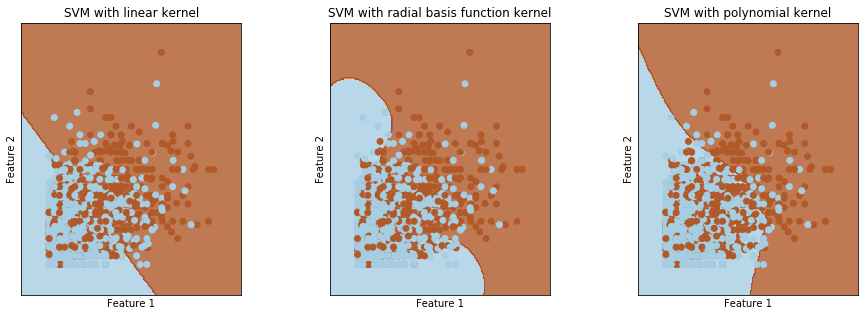

In [75]:
# Your code goes here
X_svm = X_tr_std[:,[20,75]]

svc_lin2d = SVC(kernel='linear')
svc_lin2d.fit(X_svm, y_tr)

svc_rbf2d = SVC(kernel='rbf')
svc_rbf2d.fit(X_svm, y_tr)

svc_poly2d = SVC(kernel='poly')
svc_poly2d.fit(X_svm, y_tr)

clfs = [svc_lin2d, svc_rbf2d, svc_poly2d]
title = ['SVM with linear kernel', 'SVM with radial basis function kernel', 'SVM with polynomial kernel']

show_svc_decision_boundaries(clfs, X_svm, title)

*Your answer goes here*

The plots and decission boundaries for each classifier look as expected. The decision boundary for the SVM with linear kernel is a straight line and it seems least accurate for classification which matches the accuracies calculatd in question 1.19. (0.63881 on validation set and 0.84233 on training set). The same applies to  SVMs with radial basis function and with polynomial kernels. The latter achieved the highest accuracy on the training set and this is indicated in the decision boundary, which looks like the most appropriate for the given data-points.

### ========== Question 1.21 --- [5 marks] ==========
So far we have used default parameters for training the SVM classifiers. Now we want to tune the parameters by using cross-validation. 

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of an SVM classifier with RBF kernel, while you vary the penalty parameter `C` in a logarithmic range `np.logspace(-2, 3, 10)`. Set the kernel coefficient parameter `gamma` to `auto` for this question. 

Plot the mean cross-validated classification accuracy against the regularisation parameter `C` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `C` which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

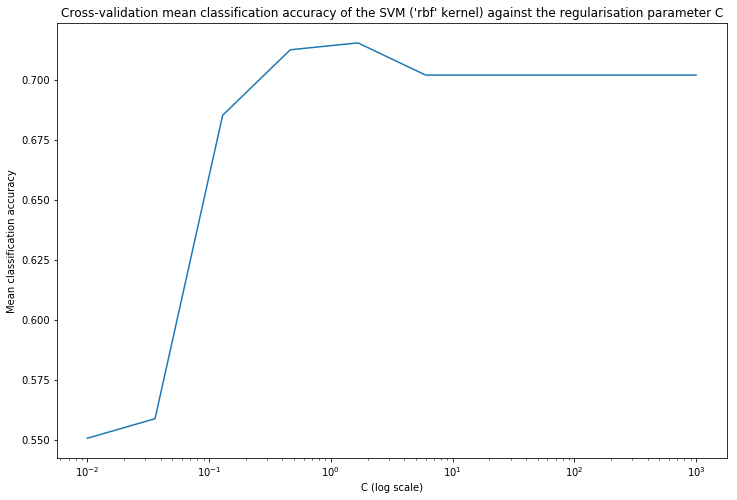

Optimal value for C:                                 1.6681005372
Mean accuracy score for SVM with optimal value of C: 0.715230644637

SVM with optimal value of C:
Classification accuracy on training set:   0.974677496417
Classification accuracy on validation set: 0.727762803235


In [76]:
# Your code goes here
c = np.logspace(-2, 3, 10)
acc_sc = np.zeros([3,10])
fold = 0

for train_index, test_index in kf:
    X_train_kf = X_tr_std[train_index]
    y_train_kf = y_tr[train_index]
    X_test_kf = X_tr_std[test_index]
    y_test_kf = y_tr[test_index]
    
    for i in range(0,10):
        svc_kf = SVC(kernel='rbf', gamma='auto', C=c[i])
        svc_kf.fit(X_train_kf,y_train_kf)
        acc_sc[fold, i] = svc_kf.score(X_test_kf, y_test_kf)
    fold = fold + 1

    
mean_c = []
for i in range(0,10):
    mean_c.append(np.mean(acc_sc[:,i]))
    
fig3 = plt.figure(figsize=(12, 8))
plt.plot(c, mean_c)
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Mean classification accuracy')
plt.title('Cross-validation mean classification accuracy of the SVM (\'rbf\' kernel) against the regularisation parameter C')
plt.show()

c_opt = c[np.argmax(mean_c)]
print('Optimal value for C:                                 {}'.format(c_opt))
print('Mean accuracy score for SVM with optimal value of C: {}'.format(np.max(mean_c)))

svc_opt = SVC(kernel='rbf', gamma='auto', C=c_opt)
svc_opt.fit(X_tr_std,y_tr)
print('\nSVM with optimal value of C:')
print('Classification accuracy on training set:   {}'.format(svc_opt.score(X_tr_std, y_tr)))
print('Classification accuracy on validation set: {}'.format(svc_opt.score(X_val_std, y_val)))

### ========== Question 1.22 --- [5 marks] ==========
Now we turn to the kernel coefficient `gamma` parameter. By using the same procedure as in the previous question, estimate the classification accuracy of an SVM classifier with RBF kernel while you vary the `gamma` parameter in a logarithmic range `logspace(-5, 0, 10)`. Fix the penalty parameter `C=1.0`.

Plot the mean cross-validated classification accuracy against the parameter `gamma` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `gamma` which yielded it.  Label axes appropriately.

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

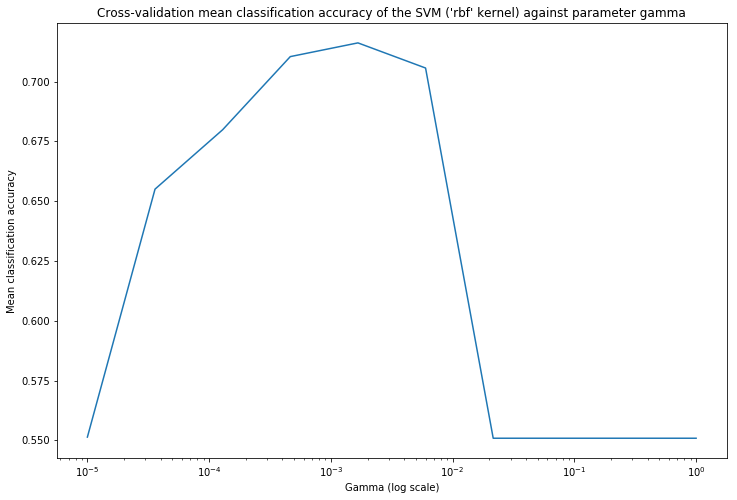

Optimal value for gamma:                                 0.0016681005372
Mean accuracy score for SVM with optimal value of gamma: 0.716185754475

SVM with optimal value of gamma:
Classification accuracy on training set:   0.891065456283
Classification accuracy on validation set: 0.726864330638


In [77]:
# Your code goes here
g = np.logspace(-5, 0, 10)
acc_sc = np.zeros([3,10])
fold = 0

for train_index, test_index in kf:
    X_train_kf = X_tr_std[train_index]
    y_train_kf = y_tr[train_index]
    X_test_kf = X_tr_std[test_index]
    y_test_kf = y_tr[test_index]
    
    for i in range(0,10):
        svc_kf = SVC(kernel='rbf', gamma=g[i], C=1.0)
        svc_kf.fit(X_train_kf, y_train_kf)
        acc_sc[fold, i] = svc_kf.score(X_test_kf, y_test_kf)
    fold = fold + 1
    
mean_g = []
for i in range(0,10):
    mean_g.append(np.mean(acc_sc[:,i]))
    
fig4 = plt.figure(figsize=(12, 8))
plt.plot(g, mean_g)
plt.xscale('log')
plt.xlabel('Gamma (log scale)')
plt.ylabel('Mean classification accuracy')
plt.title('Cross-validation mean classification accuracy of the SVM (\'rbf\' kernel) against parameter gamma')
plt.show()

g_opt = g[np.argmax(mean_g)]
print('Optimal value for gamma:                                 {}'.format(g_opt))
print('Mean accuracy score for SVM with optimal value of gamma: {}'.format(np.max(mean_g)))

svc_opt_g = SVC(kernel='rbf', gamma=g_opt, C=1.0)
svc_opt_g.fit(X_tr_std,y_tr)
print('\nSVM with optimal value of gamma:')
print('Classification accuracy on training set:   {}'.format(svc_opt_g.score(X_tr_std, y_tr)))
print('Classification accuracy on validation set: {}'.format(svc_opt_g.score(X_val_std, y_val)))

### ========== Question 1.23 --- [7 marks] ==========
Now we wish to tune both the `C` and `gamma` parameters simultaneously. To save computational time, we will now constrain the parameter search space. Define a `4 X 4` grid for the two parameters, as follows:
* `C`: `np.logspace(-2, 1, 4)`
* `gamma`: `np.logspace(-4, -1, 4)`

Estimate the mean cross-validated classification accuracy by using training data only and all possible configurations for the two parameters. 

Use a [heatmap](https://seaborn.github.io/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) to visualise the mean cross-validated classification accuracy for all `C`-`gamma` pairs. Label axes appropriately and display the values for `C` and `gamma` for the best performing configuration. 

Finally, by using the optimal configuration, train a classifier (without using cross-validation) and report the classification accuracy on the training and validation sets.

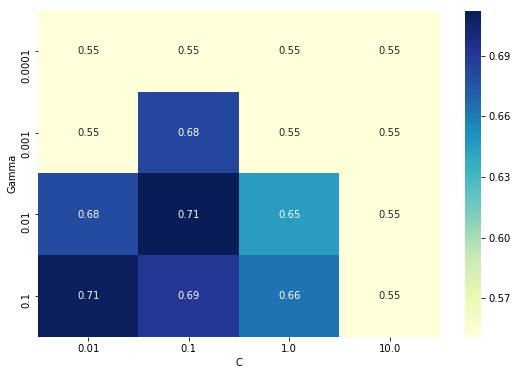

Optimal value for gamma:                                       0.01
Optimal value for C:                                           0.1
Mean accuracy score for SVM with optimal value of gamma and C: 0.712362574494

SVM with optimal value of gamma and C:
Classification accuracy on training set:   0.55088389871
Classification accuracy on validation set: 0.526504941599


In [78]:
# Your code goes here
c = np.logspace(-2, 1, 4)
g = np.logspace(-4, -1, 4)
acc_sc = np.zeros([3,4,4])
fold = 0

for train_index, test_index in kf:
    X_train_kf = X_tr_std[train_index]
    y_train_kf = y_tr[train_index]
    X_test_kf = X_tr_std[test_index]
    y_test_kf = y_tr[test_index]
    
    for i_g in range(0,4):
        for i_c in range(0,4):
            svc_kf = SVC(kernel='rbf', gamma=g[i_g], C=c[i_c])
            svc_kf.fit(X_train_kf, y_train_kf)
            acc_sc[fold, i_c, i_g] = svc_kf.score(X_test_kf, y_test_kf)
    fold = fold + 1
    
mean_gc = np.zeros([4,4])
for i in range(0,4):
    for j in range(0,4):
        mean_gc[i,j] = np.mean(acc_sc[:,i,j])
    
fig5 = plt.figure(figsize=(9, 6))
ax1 = sns.heatmap(mean_gc, yticklabels=g, xticklabels=c, annot=True, cmap='YlGnBu')
ax1.set_xlabel('C')
ax1.set_ylabel('Gamma')
plt.show()

opt = np.argmax(mean_gc)
i,j = divmod(opt,4)

g_opt = g[i]
c_opt = c[j]
print('Optimal value for gamma:                                       {}'.format(g_opt))
print('Optimal value for C:                                           {}'.format(c_opt))
print('Mean accuracy score for SVM with optimal value of gamma and C: {}'.format(np.max(mean_gc)))

svc_opt_gc = SVC(kernel='rbf', gamma=g_opt, C=c_opt)
svc_opt_gc.fit(X_tr_std,y_tr)
print('\nSVM with optimal value of gamma and C:')
print('Classification accuracy on training set:   {}'.format(svc_opt_gc.score(X_tr_std, y_tr)))
print('Classification accuracy on validation set: {}'.format(svc_opt_gc.score(X_val_std, y_val)))

### ========== Question 1.24 --- [3 marks] ==========
Is the classification accuracy on the validation set higher than in previous questions (1.22-1.23)? If not, can you explain why? Can you think of a way of further improving the performance of the classifier? You don't need to implement your suggestion at this stage. Would there be any associated problems with your suggested approach? 

*Your answer goes here*

The classification accuracy on the validation set for optimal `gamma` and `C` (question 1.23.) is almost the same as the accuracy on the same set for classifiers from questions 1.21. and 1.22. This is because (in question 1.23.) we picked very similar values for `gamma` and `C` as for the questions 1.21 and 1.22. separately.

We culd improve our classifier further by searching for more optimal values of `gamma` and `C` by searching around the 'optimal' values from question 1.23. (around 0.001 for `gamma` and around 1 for `C`). However, if we want to consider enough amount of values, this might be computationally expensive and it could take much more time (without any significant difference in the accuracy as we observed before).

### ========== Question 1.25 --- [5 marks] ==========
Now we want to evaluate the performance of an SVM classifier with polynomial kernel. Once again, we will tune the `degree` parameter by using cross-validation (similarly to what we did in Questions 1.21 and 1.22).

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of polynomial SVM classifier, while you vary the `degree` parameter in the range `np.arange(1,8)`. 

Plot the mean cross-validated classification accuracy against the polynomial degree. Display the highest obtained mean accuracy score and the value of the `degree` parameter which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

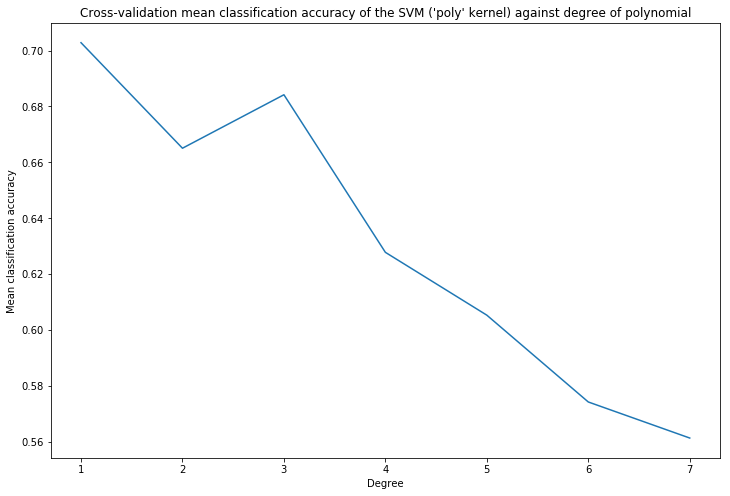

Optimal value for degree:                                 1
Mean accuracy score for SVM with optimal value of degree: 0.702810105802

SVM with optimal value of degree:
Classification accuracy on training set:   0.783564261825
Classification accuracy on validation set: 0.689128481581


In [26]:
# Your code goes here
deg = np.arange(1,8)
acc_sc = np.zeros([3,7])
fold = 0

for train_index, test_index in kf:
    X_train_kf = X_tr_std[train_index, :]
    y_train_kf = y_tr[train_index]
    X_test_kf = X_tr_std[test_index, :]
    y_test_kf = y_tr[test_index]
    
    for i in range(0,7):
        svc_kf = SVC(kernel='poly', degree=deg[i])
        svc_kf.fit(X_train_kf, y_train_kf)
        acc_sc[fold, i] = svc_kf.score(X_test_kf, y_test_kf)
    fold = fold + 1
    
mean_deg = []
for i in range(0,7):
    mean_deg.append(np.mean(acc_sc[:,i]))
    
fig6 = plt.figure(figsize=(12, 8))
plt.plot(deg, mean_deg)
plt.xlabel('Degree')
plt.ylabel('Mean classification accuracy')
plt.title('Cross-validation mean classification accuracy of the SVM (\'poly\' kernel) against degree of polynomial')
plt.show()

deg_opt = deg[np.argmax(mean_deg)]
print('Optimal value for degree:                                 {}'.format(deg_opt))
print('Mean accuracy score for SVM with optimal value of degree: {}'.format(np.max(mean_deg)))

svc_opt_deg = SVC(kernel='poly', degree=deg_opt)
svc_opt_deg.fit(X_tr_std,y_tr)
print('\nSVM with optimal value of degree:')
print('Classification accuracy on training set:   {}'.format(svc_opt_deg.score(X_tr_std, y_tr)))
print('Classification accuracy on validation set: {}'.format(svc_opt_deg.score(X_val_std, y_val)))

### ========== Question 1.26 --- [4 marks] ==========

You might have noticted that so far, we have used cross-validation for optimising the various tuning parameters (e.g. regularisation parameter in logistic regression, SVM kernel parameters) rather than hold-out validation, although we did have access to a validation set. Why do you think this is a good/bad idea? Give one advantage and one disadvantage of the two different approaches. Which one would you trust more in practice?

*Your answer goes here*

Cross validation sounds like a good idea in this case since we can use our limited data and split it into many (N) training sets to train the classifier N times. This could give us very good results in case of the accuracy and we might better generalistaion. However, this process might be very computationally expensive if the dataset is big or/and our classifier is more complex such as neural network. In neural networks, the cross-validation technique is rarely used due to the computation time constraints.

In our case we already had a validation set which was set apart. This is crutial if we want to compare the accuracy of  different models. We need to have a set of data points which none of the models has ever seen before to make the assesment maeningful.


Using hold-out validation seems less efficient in this case since we train our model only once (using the training set). This might help us with overfitting (i.e. getting great results on the training set since our classifier fits this data perfectly including its noise and does not perform that well on the data that it hasn't seen previously during the learning process; it is not good in generalising the data). However, since we might have limited resources (i.e. limited amount of data), testing set might not be representative enough (i.e. big enough) to help the model with generalisation.  

Hold-out validation can also make the training process much quicker compared to cross-validation since we use a single training set (not N of them as for cross-validation).

Considering all pros and cons of both approaches and the fact that we are not constrained by the time of the computation, I would trust cross-validation more (since we have multiple training runs).

### ========== Question 1.27 --- [6 marks] ==========

Reload the full training and validation data that contain all indicator variables for all object categories. Remove the `imgId` attribute but keep all of the class indicator variables in the dataset this time. Your training features should include all attributes except `is_person` which should be your target variable. 

Once again, use a [StandardScaler](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) to standardise your training and validation features. Then train a Random Forest Classifier by using the entropy `criterion`, 500 `n_estimators`, and also set the `random_state` to 31. Report the classification accuracy on the training and validation sets.

Similarly to what we did in Question 1.18, order the features by decreasing importance and display the 50 most important features. 

Finally, answer the following questions:
* What do you notice by looking at the list of the best 50 features?
* How does the performance differ with respect to the case when the additional class indicator variables are not present (Question 1.16)? Relate your observations to the observed feature ranking.
* Would it be easy to make use of the results in practice? Briey explain your reasoning.

*(Hint: you might want to look at some of the [images](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) to justify your explanations.)*

In [27]:
# Your code goes here
data_path_train = os.path.join(os.getcwd(), 'datasets', 'train_images_partA.csv')
train_A = pd.read_csv(data_path_train, delimiter = ',')
data_path_valid = os.path.join(os.getcwd(), 'datasets', 'valid_images_partA.csv')
valid_A = pd.read_csv(data_path_valid, delimiter = ',')

train_A = train_A.drop('imgId', axis=1)
valid_A = valid_A.drop('imgId', axis=1)

X_tr = train_A.drop('is_person', axis=1)
y_tr = train_A['is_person']
X_val = valid_A.drop('is_person', axis=1)
y_val = valid_A['is_person']

ss = StandardScaler()
ss.fit(X_tr)
X_tr_std = ss.transform(X_tr)
X_val_std = ss.transform(X_val)

rf = RandomForestClassifier(n_estimators=500, random_state=31, criterion='entropy')
rf.fit(X_tr_std,y_tr)
print('Classification accuracy on training set:   {}'.format(rf.score(X_tr_std, y_tr)))
print('Classification accuracy on validation set: {}'.format(rf.score(X_val_std, y_val)))

Classification accuracy on training set:   1.0
Classification accuracy on validation set: 0.711590296496


In [28]:
idx = (-(rf.feature_importances_)).argsort()[:50]
print('Top 50 features (name, importance):\n')
for i in idx:
    print('{}, {}'.format(X_tr.columns.values[i],rf.feature_importances_[i]))

Top 50 features (name, importance):

is_cat, 0.00937866046417
is_bird, 0.00873090561752
dim21, 0.00803026824212
dim51, 0.00592459377959
dim360, 0.00546327073015
dim4, 0.00532546357302
dim76, 0.0052711094277
dim398, 0.00525429129347
dim283, 0.00498252146873
dim479, 0.00494177091692
dim263, 0.00473384053895
dim343, 0.00460919112709
dim423, 0.00443329414592
dim485, 0.00424469000936
dim254, 0.0041885823054
dim461, 0.00415750397872
dim222, 0.00413437713582
dim356, 0.00391388758602
dim74, 0.00386033674817
dim288, 0.00385036568369
dim214, 0.00379158693266
dim348, 0.00378109590495
dim330, 0.00371254853142
dim217, 0.00368342678655
dim483, 0.00363277470756
dim90, 0.00362589036664
dim274, 0.00359703031196
dim347, 0.00353309971336
dim17, 0.00344760831567
dim427, 0.00337738812728
dim35, 0.00330582207397
dim326, 0.00329835746181
dim73, 0.00326671426012
dim312, 0.00319330779859
dim48, 0.00316041020464
dim25, 0.00315515871186
dim315, 0.00314608584832
dim322, 0.00312842465439
dim329, 0.00310113680338
d

*Your answer goes here*

The list of the top 50 features look exactly the same as before except the first 2 entries are now `is_cat` and `is_bird` (with the highest importance respectively) and one in the middle (`is_aeroplane`) It might be because, looking at the actual photos, the images containing birds, cats or aeroplanes hardly ever contain a human on the same image.

The difference in performance of the 2 classifiers does not differ much. The classification accuracy score on the validation set for the classifier with additional class indicator variables added is 0.711590296496, whereas the corresponding parameter for the classifier with no additional class indicator variables was 0.692722371968. Hence, adding new parameters did not improve classifier's performance significantly. This might be because values for importance of the top 2 newly added attributes are not extremely influencial (not much bigger values for importance as for previous top 2 values).

We might think that adding some extra attributes may improve classifier's accuracy. However, in this case the gain in performance was not significant. Hence, this helped us to decide whether to add those extra attributes or not. In this case there's no significant advantage of adding those features (maybe except `is_cat` and `is_bird`). This is useful since more attributes in the dataset means higher dimensionality of the data and more data is needed to accurately train our model.

## Mini challenge [30%]

*Important: You are allowed to write up to a maximum of 600 words in this part of the assignment. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final classification performance of your chosen method(s) and credit will be divided accordingly.*

In this final part of the assignment we will have a mini object-recognition challenge. Using the data provided you are asked to find the best classiffier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provison that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation. 

**Important:** The classification performance metric that we will use for this part is the *cross-entropy* or *logarithmic loss* (see Lab 4). You should familiarise yourself with the metric by reading the `sklearn` [user guide](http://scikit-learn.org/0.17/modules/model_evaluation.html#log-loss) and [documentation](http://scikit-learn.org/0.17/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss). To estimate this metric you will need to evaluate probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` classes, the method will return a `N` x `K` matrix.

We provide you with three new data sets: a training set (`train_images_partB.csv`), a validation set (`valid_images_partB.csv`), and a test set (`test_images_partB.csv`). You must use the former two for training and evaluating your models (as you see fit). Once you have chosen your favourite model (and pre-processing steps) you should apply it to the test set (for which no labels are provided). Estimate the posterior proabilities for the data points in the test set and submit your results as part of your answer. Your results will be evaluated in terms of the logarithmic loss metric. You also need to submit a brief description of the approaches you considered, your suggested final approach, and a short explanation of why you chose it. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final score of your chosen method(s) and credit will be divided accordingly.

*Hint: Feature engineering, feature combination, model combination and model parameter optimization can significantly improve performance.*

**How to submit your results**: Store the estimated probabilities for the data points in the test set in a 2D numpy array. Then execute the provided cell at the end of this notebook which uses a provided `save_predictions` function to export your results into a `.txt` file (the function will return an error if the provided array has not the right shape). The `.txt` file will be saved where your notebook lives. Submit this file along with your notebook as detailed at the top of this file.

*Your answer goes here (max. 600 words)*

Our first step was to load the data and then save it into appropriate data frames (`X` with attributes, `y` with targets) and explore their structures (shapes, etc.). We also decided to only consider attributes of `dim1` to `dim500` since only those are contained in the testing set.

Next step was to train baseline classifiers. The first one was just a dummy approach of classifying everything as the most frequent class. This gave us very poor results as expected. Hence, we tried an SVM with `rbf` kernel which recorded much lower value of logarithmic loss (0.69).

To improve the score further, we used a common pre-processing step of standardisation which simply standardise features by removing the mean and scaling to unit variance (`StandardScaler`). We also created a cross-validation object (`n_folds = 3`) in order to find the best parameters of `gamma` and `C` for our SVM with `rbf` kernel. The ranges used to find optimal values for `gamma` and `C` were picked experimentally (searching bigger ranges and plotting `heatmap`). According to our search, the most optimal value for `gamma` was 0.01 and 10000 for `C`. This yield very encouraging results, dropping the value for `log_loss` to 0.5893.

To make further improvements, we decided to consider other available classifiers. Unfortunately, SVM with polynomial kernel recorded pretty poor performance compared to the previous classifier. Our next choice was `LogisticRegressionCV` (aka `MaxEnt`) which implements Logistic Regression with built-in cross-validation to find out the optimal parameter `C`. This gave us encouraging results by reducing the `log_loss` slightly to 0.5849.
Nearest-Neighbours classifier did not manage record any improvement whereas Random Forest classifier (trained with different number of trees in the forest) yield slightly lower values for logarithmic loss, however the results were not consistent. Hence, we decided to discourage both of the classifiers.

Up to this point we picked two most promising classifiers which recorded the lowest values for `log_loss` (SVM with `rbf` kernel and `LogisticRegressionCV`). To improve on those we tried to pick `n` most influential attributes (with the highest feature importance value). We checked the performance for both classifiers on 50, 100 and 150 most important features with no improvement recorded.

The last step was to decide between the two classifiers. The differences in their `log_loss` values were insignificant with slightly lower value recorded for `LogisticRegressionCV` (0.5849 vs. 0.5893). Since SVMs try to minimise a distance metric, they are not probabilistic classifiers and `log_loss` is not a reliable measure of the SVM’s performance. On the other hand, `LogisticRegressionCV` tries to minimise the value of the logarithmic loss explicitly and this was the deciding factor for choosing Logistic Regression classifier over SVM with `rbf` kernel.

Another introduced method to improve the classifier’s performance was to join training and validation sets (`train_B` and `valid_B`) to generate new training and validation sets (with exact same number of data points as before) by the `train_test_split`. This was supposed to ensure that our training and validation sets are picked truly at random (not just provided by someone else who might used different criterion on picking each set). However, this did not yield any improvement in the performance of any of the considered classifiers.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.neighbors import KNeighborsClassifier
KNeighboursClassifier = KNeighborsClassifier
from sklearn.dummy import DummyClassifier

In [30]:
# Your code goes here
data_path_train = os.path.join(os.getcwd(), 'datasets', 'train_images_partB.csv')
train_B = pd.read_csv(data_path_train, delimiter = ',')

data_path_valid = os.path.join(os.getcwd(), 'datasets', 'valid_images_partB.csv')
valid_B = pd.read_csv(data_path_valid, delimiter = ',')

#Don't touch this for now!!!
data_path_test = os.path.join(os.getcwd(), 'datasets', 'test_images_partB.csv')
test_B = pd.read_csv(data_path_test, delimiter = ',')

In [31]:
#Since the test set contains only attributes of 'dim1'-'dim500' we will only consider those
names = train_B.columns[1:501].values.tolist()
X_tr = train_B[names]
y_tr = train_B['is_person']
X_val = valid_B[names]
y_val = valid_B['is_person']

In [32]:
#Dummy classifier:
dummy_classifier = DummyClassifier(strategy='most_frequent').fit(X_tr, y_tr)
pred_proba = dummy_classifier.predict_proba(X_val)
this_logloss = log_loss(y_val, pred_proba)
print(this_logloss)

16.3539399462


In [33]:
#Baseline classifier:
svc_rbf = SVC(kernel='rbf', probability=True)
svc_rbf.fit(X_tr, y_tr)
pred_proba = svc_rbf.predict_proba(X_val)

print('SVM with radial basis function kernel:')
print('Classification accuracy on training set:   {}'.format(svc_rbf.score(X_tr, y_tr)))
print('Classification accuracy on validation set: {}'.format(svc_rbf.score(X_val, y_val)))
print('Log loss on validation set:                {}'.format(log_loss(y_val, pred_proba)))

SVM with radial basis function kernel:
Classification accuracy on training set:   0.555134879319
Classification accuracy on validation set: 0.526504941599
Log loss on validation set:                0.69295865404


In [34]:
# train = [train_B, valid_B]
# training_set = pd.concat(train)

In [35]:
#To make sure that training and validation sets are selected at random, we will randomly select them ourselves
# X_tr = training_set[names]
# y_tr = training_set['is_person']
# X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, train_size=0.655, test_size=0.345, random_state=0)

# svc_rbf = SVC(kernel='rbf')
# svc_rbf.fit(X_tr, y_tr)

# #Now our classifier performs slightly better on the validation set
# print('SVM with radial basis function kernel:')
# print('Classification accuracy on training set:   {}'.format(svc_rbf.score(X_tr, y_tr)))
# print('Classification accuracy on validation set: {}'.format(svc_rbf.score(X_val, y_val)))

In [36]:
#Scaling:
ss = StandardScaler()
ss.fit(X_tr)
X_tr = ss.transform(X_tr)
X_val = ss.transform(X_val)

In [37]:
#Cross-validation:
kf = KFold(len(X_tr) , n_folds=3, shuffle=True, random_state=0)

In [38]:
#SVM('rbf'):
c = np.logspace(2, 5, 4)
g = np.logspace(-2, 1, 4)
acc_sc = np.zeros([3,4,4])
fold = 0

for train_index, test_index in kf:
    X_train_kf = X_tr[train_index]
    y_train_kf = y_tr[train_index]
    X_test_kf = X_tr[test_index]
    y_test_kf = y_tr[test_index]
    
    for i_g in range(0,4):
        for i_c in range(0,4):
            svc_kf = SVC(kernel='rbf', gamma=g[i_g], C=c[i_c])
            svc_kf.fit(X_train_kf, y_train_kf)
            acc_sc[fold, i_c, i_g] = svc_kf.score(X_test_kf, y_test_kf)
            print(g[i_g], c[i_c], svc_kf.score(X_test_kf, y_test_kf))
    fold = fold + 1

0.01 100.0 0.556028368794
0.01 1000.0 0.695035460993
0.01 10000.0 0.697872340426
0.01 100000.0 0.63829787234
0.1 100.0 0.695035460993
0.1 1000.0 0.696453900709
0.1 10000.0 0.635460992908
0.1 100000.0 0.612765957447
1.0 100.0 0.696453900709
1.0 1000.0 0.629787234043
1.0 10000.0 0.607092198582
1.0 100000.0 0.6
10.0 100.0 0.651063829787
10.0 1000.0 0.621276595745
10.0 10000.0 0.621276595745
10.0 100000.0 0.621276595745
0.01 100.0 0.553977272727
0.01 1000.0 0.664772727273
0.01 10000.0 0.680397727273
0.01 100000.0 0.660511363636
0.1 100.0 0.664772727273
0.1 1000.0 0.683238636364
0.1 10000.0 0.649147727273
0.1 100000.0 0.636363636364
1.0 100.0 0.678977272727
1.0 1000.0 0.65625
1.0 10000.0 0.636363636364
1.0 100000.0 0.632102272727
10.0 100.0 0.65625
10.0 1000.0 0.650568181818
10.0 10000.0 0.650568181818
10.0 100000.0 0.650568181818
0.01 100.0 0.551136363636
0.01 1000.0 0.694602272727
0.01 10000.0 0.693181818182
0.01 100000.0 0.654829545455
0.1 100.0 0.696022727273
0.1 1000.0 0.688920454545
0

In [39]:
mean_gc = np.zeros([4,4])
for i in range(0,4):
    for j in range(0,4):
        mean_gc[i,j] = np.mean(acc_sc[:,i,j])

opt = np.argmax(mean_gc)
i,j = divmod(opt,4)

g_opt = g[j]
c_opt = c[i]
print('Optimal value for gamma:                                       {}'.format(g_opt))
print('Optimal value for C:                                           {}'.format(c_opt))

svc_opt_gc = SVC(kernel='rbf', gamma=g_opt, C=c_opt,probability=True)
svc_opt_gc.fit(X_tr,y_tr)
pred_proba = svc_opt_gc.predict_proba(X_val)
print('\nSVM with optimal value of gamma and C:')
print('Classification accuracy on training set:   {}'.format(svc_opt_gc.score(X_tr, y_tr)))
print('Classification accuracy on validation set: {}'.format(svc_opt_gc.score(X_val, y_val)))
print('Log loss on validation set:                {}'.format(log_loss(y_val, pred_proba)))

Optimal value for gamma:                                       0.01
Optimal value for C:                                           10000.0

SVM with optimal value of gamma and C:
Classification accuracy on training set:   0.782300047326
Classification accuracy on validation set: 0.692722371968
Log loss on validation set:                0.58989578368


In [40]:
#SVM('poly'):

In [41]:
# deg = [5,10,15,20,25,30,35]#np.arange(1,8)
# acc_sc = np.zeros([3,7])
# fold = 0

# for train_index, test_index in kf:
#     X_train_kf = X_tr[train_index]
#     y_train_kf = y_tr[train_index]
#     X_test_kf = X_tr[test_index]
#     y_test_kf = y_tr[test_index]
    
#     for i in range(0,7):
#         svc_kf = SVC(kernel='poly', degree=deg[i])
#         svc_kf.fit(X_train_kf, y_train_kf)
#         acc_sc[fold, i] = svc_kf.score(X_test_kf, y_test_kf)
#         print(deg[i], svc_kf.score(X_test_kf, y_test_kf))
#     fold = fold + 1

In [42]:
# mean_deg = []
# for i in range(0,7):
#     mean_deg.append(np.mean(acc_sc[:,i]))
    
# deg_opt = deg[np.argmax(mean_deg)]
# print('Optimal value for degree:                                 {}'.format(deg_opt))
# print('Mean accuracy score for SVM with optimal value of degree: {}'.format(np.max(mean_deg)))

# svc_opt_deg = SVC(kernel='poly', degree=deg_opt)
# svc_opt_deg.fit(X_tr,y_tr)
# print('\nSVM with optimal value of degree:')
# print('Classification accuracy on training set:   {}'.format(svc_opt_deg.score(X_tr, y_tr)))
# print('Classification accuracy on validation set: {}'.format(svc_opt_deg.score(X_val, y_val)))

In [43]:
#Logistic Regression:

In [44]:
c = np.logspace(0,4,80)
lrCV = LogisticRegressionCV(solver='lbfgs', Cs=c, cv=kf)
lrCV.fit(X_tr,y_tr)
pred_proba = lrCV.predict_proba(X_val)
print('Optimal value for C:                                   {}'.format(lrCV.C_[0]))
print('Classification accuracy on validation set:             {}'.format(lrCV.score(X_val, y_val)))
print('Log loss on validation set:                            {}'.format(log_loss(y_val, pred_proba)))

Optimal value for C:                                   168.984978681
Classification accuracy on validation set:             0.686433063792
Log loss on validation set:                            0.584952379579


In [45]:
#NN:
k_list = np.arange(5,105,5)
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_tr, y_tr)
#     score = knn.score(X_val,y_val)
    pred_proba = knn.predict_proba(X_val)
    print('Performance on test with {} nearest neighbours: {}'.format(k, log_loss(y_val, pred_proba)))

Performance on test with 5 nearest neighbours: 1.54835536685
Performance on test with 10 nearest neighbours: 0.797307256329
Performance on test with 15 nearest neighbours: 0.648707272867
Performance on test with 20 nearest neighbours: 0.619805122252
Performance on test with 25 nearest neighbours: 0.619258924052
Performance on test with 30 nearest neighbours: 0.624965202132
Performance on test with 35 nearest neighbours: 0.623472017682
Performance on test with 40 nearest neighbours: 0.62437522525
Performance on test with 45 nearest neighbours: 0.624744919975
Performance on test with 50 nearest neighbours: 0.624023471637
Performance on test with 55 nearest neighbours: 0.623302168051
Performance on test with 60 nearest neighbours: 0.622062731021
Performance on test with 65 nearest neighbours: 0.623178789583
Performance on test with 70 nearest neighbours: 0.622586759895
Performance on test with 75 nearest neighbours: 0.623204472633
Performance on test with 80 nearest neighbours: 0.62510982

In [46]:
#Random Forest:

In [47]:
n = np.arange(100,1500,100)
for i in n:
    rf = RandomForestClassifier(n_estimators=i, random_state=42)
    rf.fit(X_tr,y_tr)
    pred_proba = rf.predict_proba(X_val)
    print('Classification accuracy on validation set (n = {}): {}'.format(i,log_loss(y_val, pred_proba)))

Classification accuracy on validation set (n = 100): 0.589715224078
Classification accuracy on validation set (n = 200): 0.585414936974
Classification accuracy on validation set (n = 300): 0.584290719998
Classification accuracy on validation set (n = 400): 0.58405530076
Classification accuracy on validation set (n = 500): 0.583220494377
Classification accuracy on validation set (n = 600): 0.583604616269
Classification accuracy on validation set (n = 700): 0.584241626611
Classification accuracy on validation set (n = 800): 0.583715628441
Classification accuracy on validation set (n = 900): 0.583728451695
Classification accuracy on validation set (n = 1000): 0.583750198813
Classification accuracy on validation set (n = 1100): 0.583657977007
Classification accuracy on validation set (n = 1200): 0.58367006052
Classification accuracy on validation set (n = 1300): 0.583857941
Classification accuracy on validation set (n = 1400): 0.584093302444


In [48]:
# Picking top 100 most important features

In [49]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_tr,y_tr)
idx = (-(rf.feature_importances_)).argsort()[:100]
print('Top 100 features (importance):\n')
for i in idx:
    print('{}'.format(rf.feature_importances_[i]))

Top 100 features (importance):

0.00697143156165
0.00686251690731
0.00684298912274
0.00624278628705
0.00606478452612
0.00585908982184
0.00536020203347
0.00533108257605
0.00512452487665
0.0049204371753
0.00455406866076
0.00450377641674
0.00439202998569
0.0043815275545
0.00434387186586
0.00431570780426
0.00429266058478
0.00420097093391
0.00412979657963
0.00405487801497
0.00404387577142
0.00401632620148
0.00399578809439
0.00397405586613
0.00387445521336
0.00379776927784
0.00378644439793
0.00367220234932
0.00365326457606
0.00357897046379
0.0035729678533
0.00356540635303
0.00355779934836
0.00346059480977
0.00338054220409
0.00333454120648
0.00332256270212
0.00328073575249
0.00320776645915
0.00317247050844
0.00315729664122
0.00315166814654
0.00313454009796
0.00313176935296
0.00309082040455
0.00308500327425
0.00305223906282
0.00301032443916
0.00300045387003
0.00295501637108
0.00291713622331
0.00290057547631
0.00285805794599
0.00285747857384
0.00285585867765
0.00282679418649
0.00279432428035
0.

In [51]:
# a = X_tr.columns[idx].values.tolist()
# b = X_tr[a]
# c = np.logspace(0,4,80)
# lrCV = LogisticRegressionCV(solver='lbfgs', Cs=c, cv=kf)
# lrCV.fit(b,y_tr)
# pred_proba = lrCV.predict_proba(X_val[a])
# print('Optimal value for C:                                   {}'.format(lrCV.C_[0]))
# print('Classification accuracy on validation set:             {}'.format(lrCV.score(X_val[a], y_val)))
# print('Log loss on validation set:                            {}'.format(log_loss(y_val, pred_proba)))

In [ ]:
#Train the best classifier:

In [52]:
c = np.logspace(0,4,80)
lrCV = LogisticRegressionCV(solver='lbfgs', Cs=c, cv=kf)
lrCV.fit(X_tr,y_tr)
pred_proba = lrCV.predict_proba(X_val)
print('Optimal value for C:                                   {}'.format(lrCV.C_[0]))
print('Classification accuracy on validation set:             {}'.format(lrCV.score(X_val, y_val)))
print('Log loss on validation set:                            {}'.format(log_loss(y_val, pred_proba)))

Optimal value for C:                                   168.984978681
Classification accuracy on validation set:             0.686433063792
Log loss on validation set:                            0.584952379579


In [79]:
X_test = ss.transform(test_B.drop('is_person', axis=1))

In [80]:
pred_proba = lrCV.predict_proba(X_test)

In [81]:
# Execute this cell to export your results
from numpy import savetxt
def save_predictions(pred_proba):
    if pred_proba.shape != (1114,2):
        raise ValueError('Predicted probabilities array is not the right shape.')
    
    savetxt('assignment_3_predictions.txt', pred_proba)

# You need to replace "test_images_partB_pred_proba"
# with the name of the array which contains the probability 
# estimates for the data in the test set.
save_predictions(pred_proba) 

# Appendix

## More information about visual words

Visual words are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image)